<a href="https://colab.research.google.com/github/marionwenger/DLColabNotebooks/blob/main/notebooks/12_maxlike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood
## First example of the maximum likelihood principle: throwing a die


**Goal:** In this notebook you will learn about the maximum likelihood principle.

Learn about the maximum likelihood approach by doing a little die throwing experiment: First determine the number of upcoming dollar signs,  if you assume that you throw a die with a dollar-sign on one face. Then turn the game around and use the maximum likelihood principle to estimate the most likely number of faces with a dollar-sign on a die, if you observe for example 2 dollar signs in 10 throws.

**Usage:** For additional Information read chapter 4 of the [Probabilistic Deeplearning book](https://www.manning.com/books/probabilistic-deep-learning?a_aid=probabilistic_deep_learning&a_bid=78e55885). The idea of the notebook is that you  getter a better understanding of the maximum likelihood principle by running the code, try understanding the code, checking the output, and playing with the notebook by slightly changing the code and rerunning it.

**Content:**
* calculate the probability of all possible numbers of successes in a binomial experiment
* visualize the resulting binomial probability distribution
* apply the maximum likelihood principle to estimate the parameter p of the binomial distribution


In [1]:
try: #If running in colab
    import google.colab
    IN_COLAB = True
    %tensorflow_version 2.x
except:
    IN_COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.15.0  running in colab?:  True


#### Imports

In [3]:
#load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [4]:
# Assume a die with only one face with a dollar sign
# Calculate the probability to observe in 10 throws 1- or 2-times the $-sign
# See book section 4.1
10*(1/6)*(5/6)**9, 45*(1/6)**2*(5/6)**8

(0.3230111657796916, 0.2907100492017224)

### Working with the binomial distribution

You can work with the binomial distribution, to determine the probability to observe a certain number of the dollar-signs in 10 throws. The binomal distribution has two parameters: the number of tries n (here we have 10 throws of the die, hence n=10) and the probability for sucess in one try p (because we assume a fair die with a dollar-sign on one face we have p=1/6). To calculate the probability of k successes (observed dollar-signs) in n tries (throws) you can use the function *binom.pmf*. To visualize the probability distribution you determine the probability for 0, 1, 2, ...10 successes in ten tries and plot them versus the number of successes.

#### Listing 4.1 The probability for 0 to 10 red throws using the binom function                                                                                                                                                                                                                       


Text(0, 0.5, 'Probability')

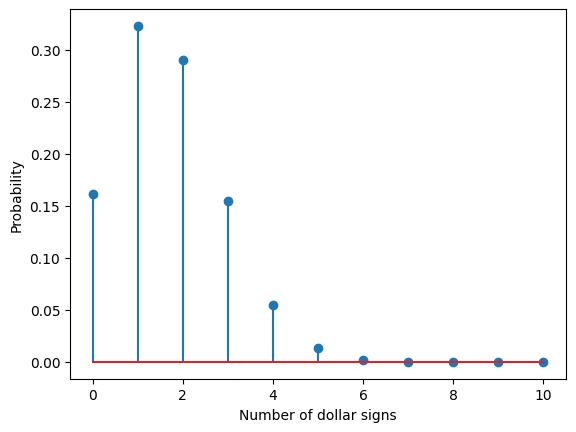

In [5]:
from scipy.stats import binom
# Define the numbers of possible successes (0 to 10)
ndollar = np.asarray(np.linspace(0,10,11), dtype='int')
# Calculate the probability to get the different number of possible successes
pdollar_sign = binom.pmf(k=ndollar, n=10, p=1/6)  # ich kenne Anzahl Seiten, hier = 1, ist fix, bei 10 Würfen wie wahrscheinlich x Dollarzeichen
plt.stem(ndollar, pdollar_sign)
plt.xlabel('Number of dollar signs')
plt.ylabel('Probability')


### Exercise

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  


*Exercise: Let's assume you observed k=2 dollar signs in n=10 throws. What do you think - how many dollar-signs are on the thrown die?*

Use the maximum likelihood approach to answer this question. To do so, follow the genius idea described in chapter 4.1 and determine the probability to observe 2 dollar-signs in 10 throws with the binomial distribution, when you assume that the die has a dollar-sign on 0,1,2 ..., or 6 faces. For which number of assumed dollar-signs on the die do you get the maximal likelihood?

In [6]:
# wir kennen den Parameter nicht
# wir kennen nur das Ergebnis der 10 Würfe
# umkehren: anstatt Daten zu variieren bei fixem Parameter
# Wkeit für 2 von 10 ist bei Wkeit P für Dollar: (p)^2(1-p)^8=p^2-p^9 --> diesen Wert nun über P maximieren, das ist der max likelihood
# d.h. 2p-9p^8 = 0, d.h. 2=9p^7, 1=4.5p^7, p = (1/4.5) siebte Wurzel...
# müsste 2/10 d.h. 0.2 sein, es geht aber nur x/6, was ist am nächsten? 1/6...



Scroll down after you finished the task

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

Text(0.5, 1.0, 'Unnormalized likelihoods')

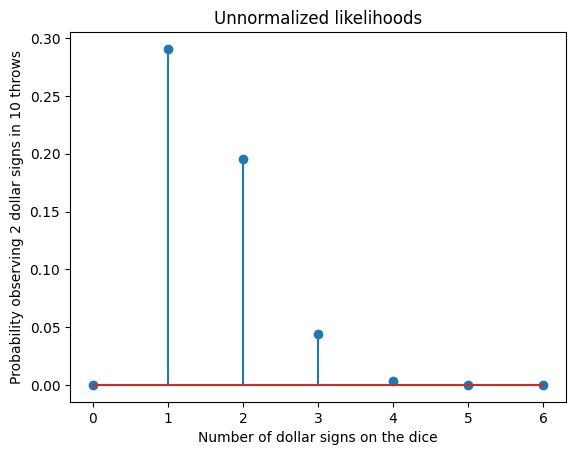

In [7]:
# Solution
from scipy.stats import binom
# define the considered numbers of dollar signs on the die (zero to six):
ndollar = np.asarray(np.linspace(0,6,7), dtype='int')
# calculate the corresponding probability of getting 2 $-sings in 10 throws
pdollar = binom.pmf(k=2, n=10, p=ndollar/6)           #B
plt.stem(ndollar, pdollar)
plt.xlabel('Number of dollar signs on the dice')
plt.ylabel('Probability observing 2 dollar signs in 10 throws')
plt.title('Unnormalized likelihoods')
